In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import metrics
from pyfm import pylibfm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/liuce/Downloads/Archive/Label.csv")
df[:10]

,brand_name,brand_label,product_name,product_label,file,Price
0,Christian Louboutin,0,shoes,0,0_0_001.png,293.43
1,Christian Louboutin,0,shoes,0,0_0_002.png,299.84
2,Christian Louboutin,0,shoes,0,0_0_003.png,216.33
3,Christian Louboutin,0,shoes,0,0_0_004.png,1.71
4,Christian Louboutin,0,shoes,0,0_0_005.png,297.71
5,Christian Louboutin,0,shoes,0,0_0_006.png,246.77
6,Christian Louboutin,0,shoes,0,0_0_007.png,114.27
7,Christian Louboutin,0,shoes,0,0_0_008.png,296.94
8,Christian Louboutin,0,shoes,0,0_0_009.png,231.29
9,Christian Louboutin,0,shoes,0,0_0_010.png,244.13


In [3]:
df.describe()

,brand_label,product_label,Price
count,2184.000000,2184.000000,2184.000000
mean,3.073260,3.468864,151.256786
std,1.891742,2.966903,86.216570
min,0.000000,0.000000,0.520000
25%,1.000000,1.000000,76.310000
50%,3.000000,2.000000,154.815000
75%,4.000000,6.000000,226.012500
max,6.000000,9.000000,299.920000


### Price Range

In [12]:
prices.describe()

count    2184.000000
mean      151.256786
std        86.216570
min         0.520000
25%        76.310000
50%       154.815000
75%       226.012500
max       299.920000
Name: Price, dtype: float64

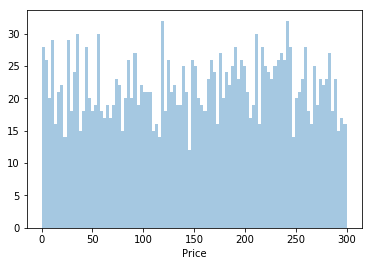

In [9]:
sns.distplot(prices, kde=False, bins = 100)

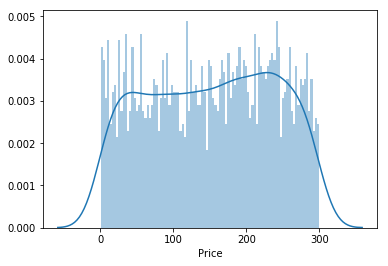

In [10]:
sns.distplot(prices, kde=True, bins = 100)

### Group By Operations with Pandas

In [66]:
gp_brand = df.groupby('brand_label')['Price']
gp_product = df.groupby('product_label')['Price']
gp_pB = df.groupby(['brand_label','product_label'])['Price']

In [67]:
gp_brand.count()

brand_label
0    237
1    344
2    267
3    333
4    468
5    247
6    288
Name: Price, dtype: int64

In [70]:
price_mean_b = list(gp_brand.mean())
price_mean_b

[154.38586497890304,
 153.45171511627902,
 149.54764044943829,
 143.23813813813803,
 148.82467948717948,
 154.79202429149788,
 157.83638888888899]

In [71]:
price_mean_p = list(gp_product.mean())
price_mean_p

[152.7334792122538,
 145.16833333333344,
 155.14463007159901,
 155.85759740259738,
 151.44479999999993,
 147.0589051094891,
 151.18596938775519,
 137.66198347107431,
 155.39537974683537,
 150.81560975609761]

### Group by Brand

In [26]:
df.sort_values("brand_label", inplace = True)
brand_list = df.brand_label.unique()
brand_list.size

7

In [27]:
brand_name_list = df.brand_name.unique()
brand_name_list

array(['Christian Louboutin', 'Chanel', 'Dolce & Gabbana', 'Gucci',
       'Christian Dior', 'Versace', 'Yves Saint Laurent'], dtype=object)

In [28]:
j = 0
length = df.shape[0]
prices_list_b = []

for brand in brand_list:
    prices_b = []
    for i in range(j, length):
        if df.iloc[i]['brand_label'] == brand:
            prices_b.append(df.iloc[i]['Price'])
        else:
            print(i)
            j = i
            break
    prices_list_b.append(prices_b)

237
581
848
1181
1649
1896


In [29]:
len(prices_list_b)

7

In [30]:
len(prices_list_b[0])

237

In [40]:
count_b = []

for p in prices_list_b:
    count_b.append(len(p))
count_b

[237, 344, 267, 333, 468, 247, 288]

In [75]:
df_brand = pd.DataFrame(
    {'brand_label': brand_list,
     'brand_name': brand_name_list,
     'prices': prices_list_b,
     'count':count_b,
     'mean_price': price_mean_b,
    })

In [76]:
df_brand

,brand_label,brand_name,count,mean_price,prices
0,0,Christian Louboutin,237,154.385865,"[293.43, 122.1, 182.79, 10.4, 217.53, 281.29, ..."
1,1,Chanel,344,153.451715,"[264.01, 234.65, 263.88, 154.44, 256.82, 165.8..."
2,2,Dolce & Gabbana,267,149.547640,"[237.72, 251.98, 218.96, 2.16, 280.69, 224.66,..."
3,3,Gucci,333,143.238138,"[264.38, 188.16, 0.8, 87.33, 78.76, 107.62, 13..."
4,4,Christian Dior,468,148.824679,"[175.69, 258.05, 221.64, 148.71, 175.47, 21.11..."
5,5,Versace,247,154.792024,"[15.97, 193.34, 141.85, 98.75, 49.29, 226.17, ..."
6,6,Yves Saint Laurent,288,157.836389,"[102.76, 20.61, 267.7, 245.52, 147.86, 261.26,..."


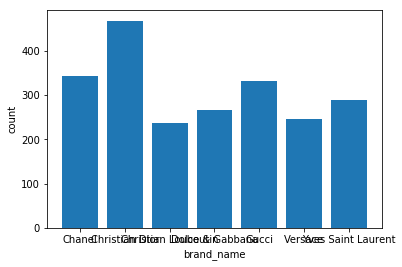

In [57]:
df_temp_b = df_brand['count']
df_temp_b.index = df_brand['brand_name']

plt.bar(df_brand['brand_name'], df_temp_b)
plt.xlabel("brand_name")  
plt.ylabel("count")
plt.show()

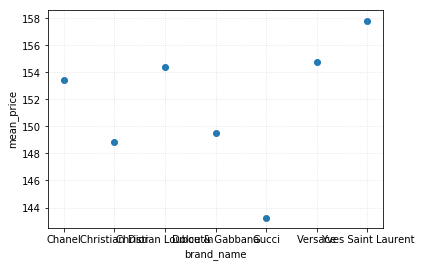

In [89]:
df_temp_b = df_brand['mean_price']
df_temp_b.index = df_brand['brand_name']

plt.scatter(df_brand['brand_name'], df_temp_b)
plt.xlabel("brand_name")  
plt.ylabel("mean_price")
plt.grid(alpha=0.4,linestyle=':')
plt.show()

### Group by Product

In [31]:
df.sort_values("product_label", inplace = True)
product_list = df.product_label.unique()
product_list.size

10

In [32]:
product_name_list = df.product_name.unique()
product_name_list

array(['shoes', 'lipstick', 'handbag', 'nail polish', 'necklace',
       'watches', 'ring', 'bracelet', 'boots', 'earrings'], dtype=object)

In [33]:
j = 0
length = df.shape[0]
prices_list_p = []

for product in product_list:
    prices_p = []
    for i in range(j, length):
        if df.iloc[i]['product_label'] == product:
            prices_p.append(df.iloc[i]['Price'])
        else:
            print(i)
            j = i
            break
    prices_list_p.append(prices_p)

457
685
1104
1258
1408
1545
1741
1862
2020


In [34]:
len(prices_list_p)

10

In [35]:
len(prices_list_p[0])

457

In [43]:
count_p = []

for p in prices_list_p:
    count_p.append(len(p))
count_p

[457, 228, 419, 154, 150, 137, 196, 121, 158, 164]

In [78]:
df_product = pd.DataFrame(
    {'product_label': product_list,
     'product_name': product_name_list,
     'prices': prices_list_p,
     'count':count_p,
     'mean_price': price_mean_p,
    })

In [79]:
df_product

,count,mean_price,prices,product_label,product_name
0,457,152.733479,"[293.43, 248.57, 228.66, 59.51, 236.21, 205.16...",0,shoes
1,228,145.168333,"[186.85, 279.75, 260.39, 26.19, 219.34, 284.68...",1,lipstick
2,419,155.144630,"[237.45, 287.45, 169.82, 14.49, 149.91, 288.37...",2,handbag
3,154,155.857597,"[91.91, 28.27, 51.8, 81.27, 66.71, 226.24, 120...",3,nail polish
4,150,151.444800,"[41.31, 288.66, 258.94, 252.82, 175.1, 241.55,...",4,necklace
5,137,147.058905,"[246.71, 109.67, 57.72, 82.56, 123.78, 50.2, 2...",5,watches
6,196,151.185969,"[54.04, 273.58, 148.34, 222.81, 7.81, 65.51, 2...",6,ring
7,121,137.661983,"[186.77, 110.7, 2.06, 113.32, 149.19, 289.5, 2...",7,bracelet
8,158,155.395380,"[46.45, 15.97, 261.78, 284.23, 88.84, 186.89, ...",8,boots
9,164,150.815610,"[298.29, 206.97, 217.47, 11.74, 8.61, 18.57, 4...",9,earrings


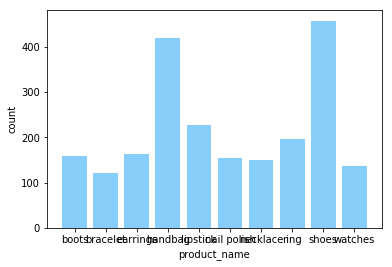

In [59]:
df_temp_p = df_product['count']
df_temp_p.index = df_product['product_name']

plt.bar(df_product['product_name'], df_temp_p, color="#87CEFA")
plt.xlabel("product_name")  
plt.ylabel("count")
plt.show()

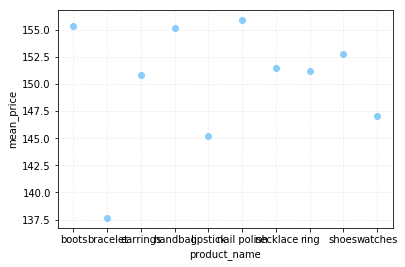

In [90]:
df_temp_p = df_product['mean_price']
df_temp_p.index = df_product['product_name']

plt.scatter(df_product['product_name'], df_temp_p, color="#87CEFA")
plt.xlabel("product_name")  
plt.ylabel("mean_price")
plt.grid(alpha=0.4,linestyle=':')
plt.show()